In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y = make_moons(n_samples=1000,noise=0.1,random_state=0)
print(X.shape,y.shape)
print(X)
print("******\n",y)

(1000, 2) (1000,)
[[ 2.04271531  0.51812416]
 [ 1.72033708 -0.13233804]
 [-0.26386729  0.76382643]
 ..., 
 [ 0.33823662 -0.43099924]
 [ 0.1269428   0.09966251]
 [ 0.54241537 -0.47450809]]
******
 [1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0

In [4]:
print("For ob -\n",X[y==0,0][0:2])
print(X[y==0,1][0:2])
print("&&&&&&&&&&&&&&&&")
print("For xr - \n",X[y==1,0][0:2])
print(X[y==1,1][0:2])

For ob -
 [-0.26386729  0.92760463]
[ 0.76382643  0.33816128]
&&&&&&&&&&&&&&&&
For xr - 
 [ 2.04271531  1.72033708]
[ 0.51812416 -0.13233804]


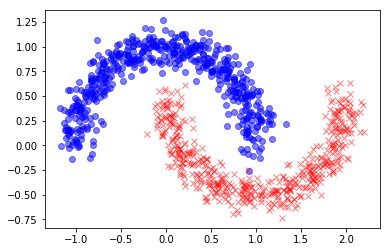

In [5]:
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [9]:
model = Sequential()
'''
You can create a Sequential model by passing a list of layer instances to the constructor.
'''
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
'''
Some 2D layers, such as Dense, support the specification of their 
input shape via the argument input_dim, and 
some 3D temporal layers support the arguments input_dim and input_length.
'''
model.compile(Adam(lr=0.35), 'binary_crossentropy', metrics=['accuracy'])
'''
A loss function. This is the objective that the model will try to minimize. 
It can be the string identifier of an existing loss function - binary_crossentropy
'''

'\nA loss function. This is the objective that the model will try to minimize. \nIt can be the string identifier of an existing loss function - binary_crossentropy\n'

In [10]:
model.fit(X_train, y_train, epochs=200, verbose=0)
'''An epoch is an iteration over the entire `x` and `y`
        data provided.'''

'An epoch is an iteration over the entire `x` and `y`\n        data provided.'

In [11]:
results = model.evaluate(X_test, y_test)
results

300/300 [==============================] - 0s 111us/step


[0.31553808530171712, 0.83666666746139529]

In [12]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.837


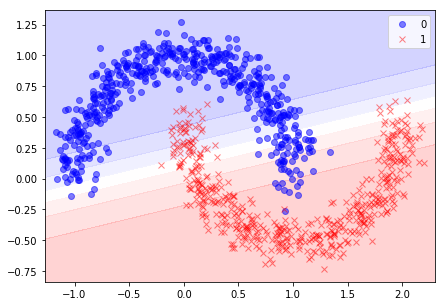

In [13]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

In [14]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)


300/300 [==============================] - 0s 154us/step


[0.0065615825960412622, 0.9966666666666667]

In [19]:
results = model.evaluate(X_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

300/300 [==============================] - 0s 42us/step
The Accuracy score on the Train set is:	0.997


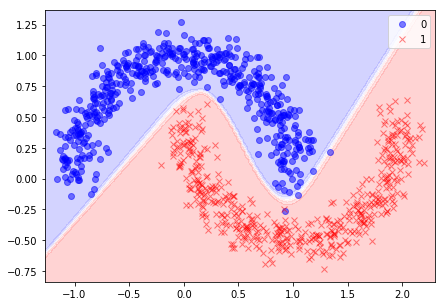

In [20]:
plot_decision_boundary(model,X,y)